In [147]:
%load_ext lab_black
import pandas as pd

df = pd.read_hdf("../data/observations.hdf", "key")
df_evi = pd.read_csv("../data/satdata/evi.csv", index_col=0)
df_evi["year"] = df_evi.index.str.slice(0, 4)
df_evi_year = df_evi.groupby(df_evi.year).mean()
df_evi_year.index = df_evi_year.index.astype(int)
df_evi_year_change = df_evi_year.ffill().pct_change()
df = df.groupby(["BU_NAAM", "year"]).sum()
df = df[df.obs_rarity > 50].sort_values("year")
df = df.obs_rarity.unstack("year")
df_norm = df / df.sum()
df_norm = df_norm.T
df_change = df_norm.T.ffill().pct_change().T

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [160]:
# heel lelijk
res = []
for year, row in df_norm.iterrows():
    for wijk in row.keys():
        try:
            evi_val = df_evi_year.loc[int(year)][wijk]
        except Exception:
            continue
        res.append({"year": year, "wijk": wijk, "obs": row[wijk], "evi": evi_val})

In [161]:
df_res = pd.DataFrame(res)
df_res.head()

,year,wijk,obs,evi
0,2000,Emer,0.181978,1974.230710
1,2000,Buitengebied Prinsenbeek,0.239906,4204.121843
2,2000,Ulvenhout,0.148625,3308.475932
3,2000,Mastbos,0.224108,3666.585093
4,2000,Doornbos-Linie,0.087185,2208.005288


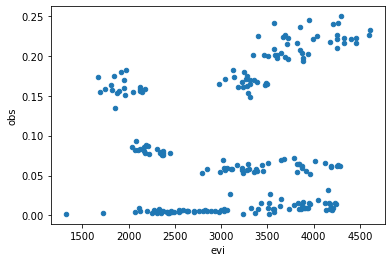

In [162]:
df_res.plot.scatter("evi", "obs")

In [170]:
df_res.obs.groupby(pd.qcut(df_res.evi, 4)).mean()

evi
(1170.443, 2218.112]    0.112578
(2218.112, 2986.2]      0.025622
(2986.2, 3647.413]      0.095950
(3647.413, 4609.955]    0.110040
Name: obs, dtype: float64

In [166]:
df_res.corr()

,year,obs,evi
year,1.000000,-0.346455,0.080295
obs,-0.346455,1.000000,0.177696
evi,0.080295,0.177696,1.000000
